In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Bouncer,2015
1,Indi,2007
2,Just Another Noir,2011
3,Viva la juventud!,1956
4,Yerra Mandaram,1991


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

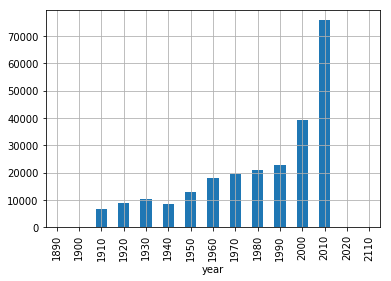

In [103]:
titles.groupby(titles.year // 10 * 10).size().sort_index().plot(kind = 'bar', grid = True)

### Use groupby() to plot the number of "Hamlet" films made each decade.

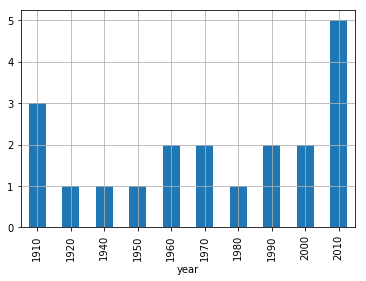

In [104]:
titles[titles.title == 'Hamlet'].groupby(titles.year // 10 * 10).size().sort_index().plot(grid = True, kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [107]:
cast[(cast.n == 1) & (cast.year // 10 == 195)].groupby(by = ['year','type']).size()

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [108]:
cast[(cast.year // 10 == 195) & (cast.n >= 1) & (cast.n <= 5)].groupby(by = ['n','type']).size()

n    type   
1.0  actor      6692
     actress    3040
2.0  actor      4640
     actress    4635
3.0  actor      5654
     actress    3201
4.0  actor      5663
     actress    2881
5.0  actor      5674
     actress    2592
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [143]:
cast[(cast.title == 'The Pink Panther') & (cast.n.notnull())] .groupby(['year']).size()

year
1963    15
2006    51
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [154]:
h = cast[(cast.name == 'Frank Oz')].groupby(by=['title','year']).size()
h = h[h > 1]

In [157]:
h.sort_index(level=1)

title                                 year
The Muppet Movie                      1979    8
An American Werewolf in London        1981    2
The Great Muppet Caper                1981    6
The Dark Crystal                      1982    2
The Muppets Take Manhattan            1984    7
Follow That Bird                      1985    3
The Muppet Christmas Carol            1992    7
Muppet Treasure Island                1996    4
Muppets from Space                    1999    4
The Adventures of Elmo in Grouchland  1999    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [164]:
h = cast[cast.name == 'Frank Oz'].groupby('character').size()
h = h[h > 1]

In [166]:
h.sort_values(ascending=False)

character
Yoda              6
Miss Piggy        6
Animal            6
Sam the Eagle     5
Cookie Monster    5
Fozzie Bear       4
Bert              3
Grover            2
dtype: int64